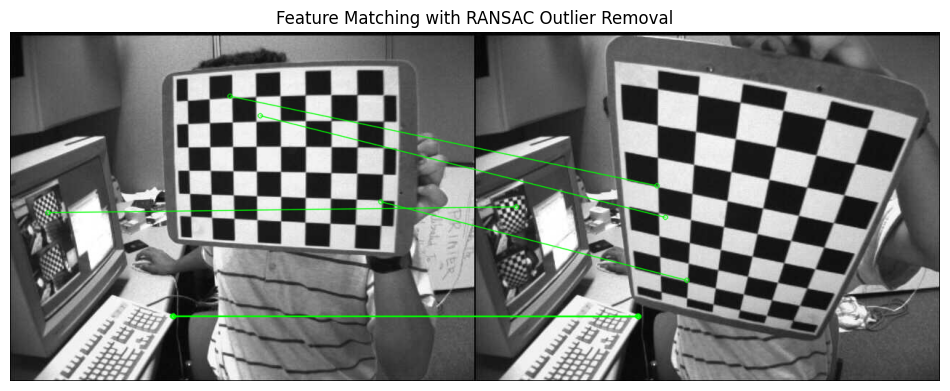

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
img1 = cv2.imread('left01.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('left02.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher (Brute Force Matcher) object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography matrix using RANSAC
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use mask to draw only inlier matches
matchesMask = mask.ravel().tolist()

# Draw matches
draw_params = dict(matchColor=(0, 255, 0),  # Draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # Draw only inliers
                   flags=2)

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, **draw_params)

# Display the matching result
plt.figure(figsize=(12, 6))
plt.imshow(img3)
plt.title('Feature Matching with RANSAC Outlier Removal')
plt.axis('off')
plt.show()
